In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Resumen:
El presente reporte, tiene como objetivo la descripcion de los datos obtenidos de "The Behavioral Risk Factor Surveillance System (BRFSS)", que viene a ser el sistema de recoleccion de datos sobra salud en estados unidos, realizado por Centers for Disease Control and Prevetion el cual es el organismo que vela por la salud publica a traves de ciencia y analisis de datos.

Los datos han sido descargados de la plataforma educativa DataCamp

Pagina de Web - The Behavioral Risk Factor Surveillance System (BRFSS)
https://www.cdc.gov/brfss/

#### Carga y Limpieza de Datos

In [2]:
data_encuesta = pd.read_hdf(r'C:\Analitics Dev\DataCamp\Datasets\Exploratory Data Analysis\Behavioral Risk Factor Surveillance System.hdf5')

In [3]:
#Diccionario de las categorias de los sueldos
List_income = ['< 15k','< 15k','15k< >25k','15k< >25k','25k< >30k','30k< >50k','50k< >100k','50k< >100k',np.nan]
INCOME2 = sorted(np.array(data_encuesta['INCOME2'].unique()))
dt_Income= pd.DataFrame({
    'Id_Income2' : INCOME2,
    'Denom_Income' : List_income
})

In [4]:
#Diccionario de las categorias de edades
List_age = ['18<>24','25<>29','30<>34','35<>39','40<>44','45<>49','50<>54','55<>59','60<>64','65<>69','70<>74','75<>79','80<>89',np.nan]
AGEG5YR = sorted(np.array(data_encuesta['_AGEG5YR'].unique()))
dt_Age= pd.DataFrame({
    'Id_Income2' : AGEG5YR,
    'Denom_Income' : List_age
})

In [5]:
data_encuesta.rename({'HTM4':'Altura','WTKG3':'Peso','_VEGESU1':'Veg_Consumidos','INCOME2':'Cat_Ingresos','_AGEG5YR':'Cat_Edad','AGE':'Edad'},axis=1,inplace=True)

In [6]:
data_encuesta.dropna(subset=['SEX'],inplace=True)
data_encuesta.shape

(99938, 9)

In [7]:
#Clasificación de los generos
data_encuesta['Genero'] = np.where(data_encuesta['SEX']==1,"Masculino",np.where(data_encuesta['SEX']==2,"Femenino",np.nan))

In [8]:
data_encuesta.drop(['_HTMG10','SEX'],axis=1,inplace=True)

In [9]:
data_encuesta.head()

,Altura,Peso,Cat_Ingresos,_LLCPWT,Cat_Edad,Veg_Consumidos,Edad,Genero
96230,160.0,60.33,8.0,1398.525290,6.0,2.14,47.0,Femenino
244920,163.0,58.97,5.0,84.057503,13.0,3.14,89.5,Femenino
57312,163.0,72.57,8.0,390.248599,5.0,2.64,42.0,Femenino
32573,165.0,74.84,1.0,11566.705300,3.0,1.46,32.0,Femenino
355929,170.0,108.86,3.0,844.485450,3.0,1.81,32.0,Femenino


In [10]:
data_encuesta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99938 entries, 96230 to 379327
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Altura          95101 non-null  float64
 1   Peso            93363 non-null  float64
 2   Cat_Ingresos    83406 non-null  float64
 3   _LLCPWT         99938 non-null  float64
 4   Cat_Edad        98749 non-null  float64
 5   Veg_Consumidos  87667 non-null  float64
 6   Edad            98749 non-null  float64
 7   Genero          99938 non-null  object 
dtypes: float64(7), object(1)
memory usage: 6.9+ MB


#### EDA: Exploratoring Data Analysis

In [11]:
data_encuesta['Genero'].value_counts()

Femenino     51349
Masculino    48589
Name: Genero, dtype: int64

##### Descripción de Altura
##### Detalle el información obtenida de las relaciones entre la altura y de las demas variables

In [12]:
data_encuesta.groupby('Genero')['Edad'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Femenino,50696.0,48.649243,19.222262,21.0,32.0,47.0,62.0,89.5
Masculino,48053.0,46.736759,18.446782,21.0,32.0,47.0,62.0,89.5


In [13]:
data_encuesta.groupby('Genero')['Altura'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Femenino,48620.0,162.968531,7.582218,91.0,157.0,163.0,168.0,224.0
Masculino,46481.0,177.538048,8.350154,103.0,173.0,178.0,183.0,226.0


In [14]:
data_encuesta.reset_index(inplace=True)

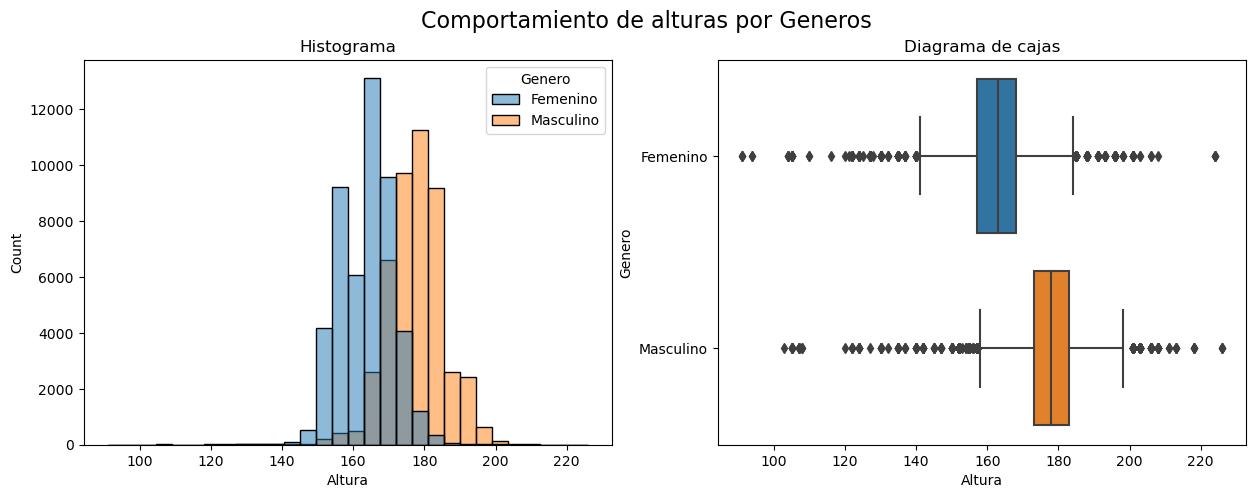

In [15]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=data_encuesta,x='Altura',hue='Genero',bins=30,ax=ax[0])
sns.boxplot(data=data_encuesta,x='Altura',y='Genero',ax=ax[1])
fig.suptitle('Comportamiento de alturas por Generos', fontsize=16)
ax[0].set_title('Histograma')
ax[1].set_title('Diagrama de cajas')
plt.show()

In [16]:
#Agrupacion para el promedio de altura
altura_edades = data_encuesta.groupby(['Genero','Edad'])['Altura'].mean()
altura_edades = altura_edades.reset_index()

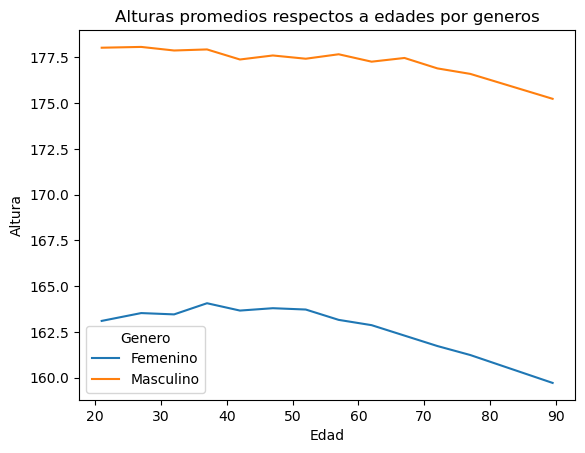

In [17]:
sns.lineplot(data=altura_edades,x='Edad',y='Altura',hue='Genero')
plt.title('Alturas promedios respectos a edades por generos')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
altura_edades_femenino = altura_edades.query('Genero=="Femenino"')
altura_edades_masculino = altura_edades.query('Genero=="Masculino"')

In [20]:
#Regresion lineal - Masculinos
altura_m = np.array(altura_edades_masculino['Altura']).reshape(-1, 1)
edad_m = np.array(altura_edades_masculino['Edad']).reshape(-1, 1)
lr_m = LinearRegression()
lr_m = lr_m.fit(edad_m,altura_m)
altura_m_pred = lr_m.predict(edad_m)
print(lr_m.coef_,lr_m.intercept_)
print('Quiere decir que en los hombres, la altura disminuye una razon de 0.03 cm')

[[-0.03217368]] [179.03615352]
Quiere decir que en los hombres, la altura disminuye una razon de 0.03 cm


In [21]:
#Regresion lineal - Femeninos
altura_f = np.array(altura_edades_femenino['Altura']).reshape(-1, 1)
edad_f = np.array(altura_edades_femenino['Edad']).reshape(-1, 1)
lr_f = LinearRegression()
lr_f = lr_m.fit(edad_f,altura_f)
altura_f_pred = lr_m.predict(edad_m)
print(lr_f.coef_,lr_f.intercept_)
print('Quiere decir que en las mujeres, la altura disminuye una razon de 0.05 cm')

[[-0.04981498]] [165.41108126]
Quiere decir que en las mujeres, la altura disminuye una razon de 0.05 cm


In [22]:
#Funcion para el calculo de la pendiente
def pendiente (x,y):
    lr = LinearRegression()
    lr = lr.fit(x,y)
    pendiente = lr.coef_
    return pendiente

In [23]:
len(altura_f),len(altura_m)

(13, 13)

In [24]:
pendiente_altura_m = []
for i in range(11):
    x = edad_m[i:]
    y = altura_m[i:]
    p = pendiente(x,y)
    pendiente_altura_m.append(p[0][0])

In [25]:
pendiente_altura_f = []
for i in range(11):
    x = edad_f[i:]
    y = altura_f[i:]
    p = pendiente(x,y)
    pendiente_altura_f.append(p[0][0])

In [39]:
tabla_pendiente = pd.DataFrame({
    'Edad_m' : np.array(altura_edades.query('Genero=="Masculino"').iloc[:11,1]),
    'Pend_m' : pendiente_altura_m,
    'Edad_f' : np.array(altura_edades.query('Genero=="Femenino"').iloc[:11,1]),
    'Pend_f' : pendiente_altura_f
},index=np.arange(0,11))
print(tabla_pendiente)
print('A partir de los 62 años, en el genero masculino disminuye en promedio 0.07 cm \ny en el femenenino a 0.11 cm, considerando este limite de edad para laborar, para mas edad, incremente el ritmo descendente')

    Edad_m    Pend_m  Edad_f    Pend_f
0     21.0 -0.032174    21.0 -0.049815
1     27.0 -0.034947    27.0 -0.060486
2     32.0 -0.036854    32.0 -0.069583
3     37.0 -0.040137    37.0 -0.081460
4     42.0 -0.042193    42.0 -0.087774
5     47.0 -0.051758    47.0 -0.098573
6     52.0 -0.059785    52.0 -0.105865
7     57.0 -0.072948    57.0 -0.108143
8     62.0 -0.079943    62.0 -0.114169
9     67.0 -0.097764    67.0 -0.114810
10    72.0 -0.097647    72.0 -0.116464
A partir de los 62 años, en el genero masculino disminuye en promedio 0.07 cm 
y en el femenenino a 0.11 cm, considerando este limite de edad para laborar, para mas edad, incremente el ritmo descendente


##### Descripción de Peso
##### Detalle el información obtenida de las relaciones entre la altura y de las demas variables

In [55]:
data_encuesta.groupby('Genero')['Peso'].describe()

,count,mean,std,min,25%,50%,75%,max
Genero,,,,,,,,
Femenino,46887.0,73.624387,18.873356,23.13,60.78,70.31,82.10,272.16
Masculino,46476.0,88.838712,20.135079,24.95,74.84,86.18,99.79,272.61


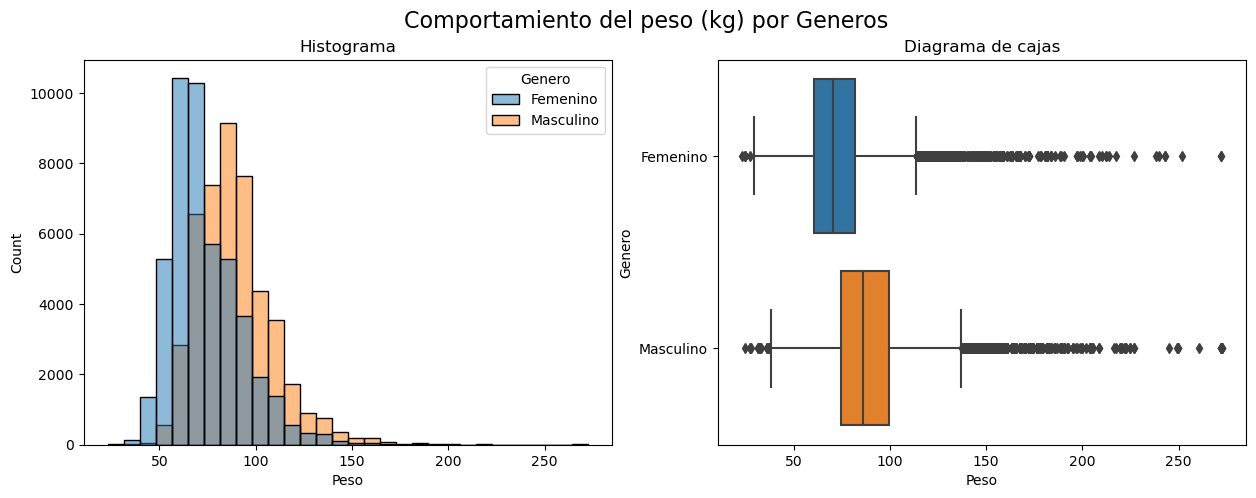

El promedio de peso en los hombres es de 88kg y de mujeres es de 73kg, tienendo desv de 20kg y 18 respectivamente


In [56]:
fig , ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=data_encuesta,x='Peso',hue='Genero',bins=30,ax=ax[0])
sns.boxplot(data=data_encuesta,x='Peso',y='Genero',ax=ax[1])
fig.suptitle('Comportamiento del peso (kg) por Generos', fontsize=16)
ax[0].set_title('Histograma')
ax[1].set_title('Diagrama de cajas')
plt.show()
print('El promedio de peso en los hombres es de 88kg y de mujeres es de 73kg, tienendo desv de 20kg y 18 respectivamente')

In [58]:
#Agrupacion para el promedio de pesos
peso_edades = data_encuesta.groupby(['Genero','Edad'])['Peso'].mean()
peso_edades = peso_edades.reset_index()

In [73]:
peso_edades.sort_values(['Genero','Peso'],ascending=False,inplace=True)
peso_m = peso_edades.query('Genero=="Masculino"').iloc[:1,:]
peso_f = peso_edades.query('Genero=="Femenino"').iloc[:1,:]
pd.concat([peso_m,peso_f])

,Genero,Edad,Peso
18,Masculino,47.0,92.964426
6,Femenino,52.0,77.192576


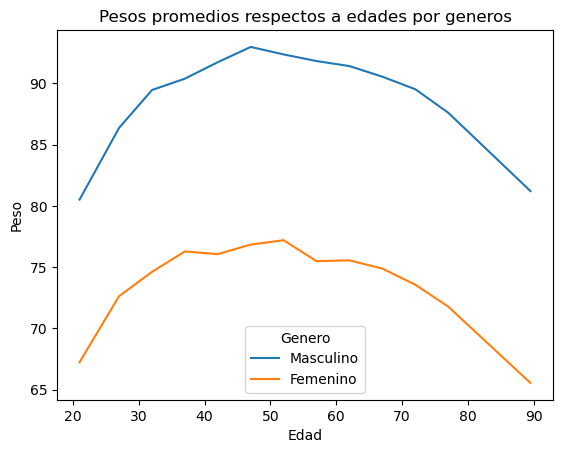

Observamos una curva en ascedente hasta una edad media, el peso maximo promedio en varones es de 92kg 
a los 42 años y en mujeres es de 77kg a los 52. Otro dato a rescatar es la similitud de los datos en las ededes 
iniciales y finales


In [76]:
sns.lineplot(data=peso_edades,x='Edad',y='Peso',hue='Genero')
plt.title('Pesos promedios respectos a edades por generos')
plt.show()
print('Observamos una curva en ascedente hasta una edad media, el peso maximo promedio en varones es de 92kg \na los 42 años y en mujeres es de 77kg a los 52. Otro dato a rescatar es la similitud de los datos en las ededes \niniciales y finales')

### Relacion entre cosumo de vegatales con altura y peso

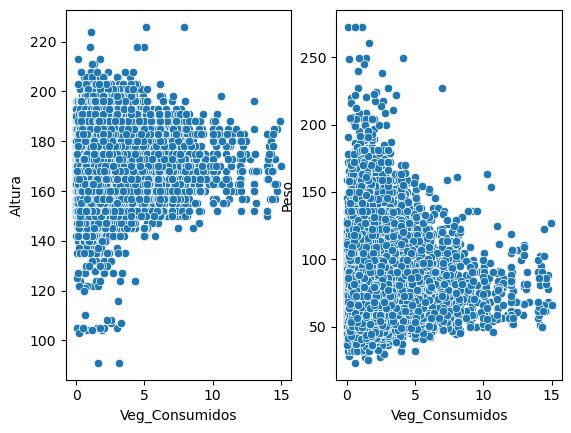

Apriori no se tiene un relacion directa entre las alturas y el consumo de vegetales diarios, sujeto a mayor analisis


In [82]:
data_encuesta_veg = data_encuesta.dropna(subset=['Veg_Consumidos'])
fig,ax = plt.subplots(1,2)
sns.scatterplot(data=data_encuesta_veg,x='Veg_Consumidos',y='Altura',ax=ax[0])
sns.scatterplot(data=data_encuesta_veg,x='Veg_Consumidos',y='Peso',ax=ax[1])
plt.show()
print('Apriori no se tiene un relacion directa entre las alturas y el consumo de vegetales diarios, sujeto a mayor analisis')